In [1]:
import pickle

In [2]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [3]:
input_file = './data/data_singlevar_regr.txt'

In [4]:
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, : -1], data[:, -1]

In [5]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [6]:
X_train, y_train = X[:num_training], y[:num_training]

In [7]:
X_test, y_test = X[:num_training], y[:num_training:]

In [8]:
regressor = linear_model.LinearRegression()

In [9]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_test_pred = regressor.predict(X_test)

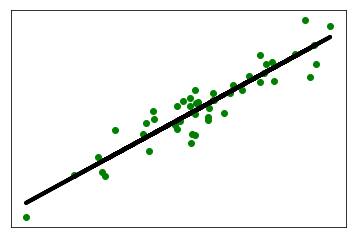

In [11]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_test_pred, color = 'black', linewidth = 4)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
print("Linear regressor preformance")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("R2 Score = ", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor preformance
Mean absolute error =  0.66
Mean squared error =  0.66
Median absolute error =  0.56
R2 Score =  0.86


In [13]:
output_model_file = 'model.pkl'

In [14]:
with open('./data/' + output_model_file, 'wb') as f:
    regressor_model = pickle.dump(regressor, f)

In [15]:
with open('./data/' + output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [16]:
y_test_pred_new = regressor_model.predict(X_test)
print("New mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

New mean absolute error =  0.66
